In [1]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_excel("개체번호, 연도 통합.xlsx", sheet_name='combined')

In [3]:
df.head()

,FARM_ID,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,EXTN_TPRT,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,PLANT_AR_SQM,SHPMN_QTY,SHPMN_AMT
0,GBE_KRMLN_002000at,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,NaN,NaN,NaN,NaN,NaN,NaN,19800,NaN,NaN
1,GBE_KRMLN_002000at,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,NaN,NaN,NaN,NaN,NaN,NaN,19800,NaN,NaN
2,GBE_KRMLN_002000at,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,NaN,NaN,NaN,NaN,NaN,NaN,19800,NaN,NaN
3,GBE_KRMLN_002000at,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,NaN,NaN,NaN,NaN,NaN,NaN,19800,NaN,NaN
4,GBE_KRMLN_002000at,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,NaN,NaN,NaN,NaN,NaN,NaN,19800,NaN,NaN


In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FARM_ID          17544 non-null  object        
 1   MSRM_DT          17544 non-null  datetime64[ns]
 2   AREA_TPRT        17539 non-null  float64       
 3   AREA_HMDT        17517 non-null  float64       
 4   AREA_WDSP        17544 non-null  float64       
 5   INNER_TPRT       10100 non-null  float64       
 6   INNER_HMDT       9615 non-null   float64       
 7   INNER_CBDX_CTRN  7528 non-null   float64       
 8   EXTN_TPRT        0 non-null      float64       
 9   PLT_LNGTH        120 non-null    float64       
 10  LEAF_LNGTH       1488 non-null   float64       
 11  LEAF_WDTH        1488 non-null   float64       
 12  STEM_THNS        1488 non-null   float64       
 13  PLANT_AR_SQM     17544 non-null  int64         
 14  SHPMN_QTY        2640 non-null   float

In [6]:
df.isna().sum()

FARM_ID                0
MSRM_DT                0
AREA_TPRT              5
AREA_HMDT             27
AREA_WDSP              0
INNER_TPRT          7444
INNER_HMDT          7929
INNER_CBDX_CTRN    10016
EXTN_TPRT          17544
PLT_LNGTH          17424
LEAF_LNGTH         16056
LEAF_WDTH          16056
STEM_THNS          16056
PLANT_AR_SQM           0
SHPMN_QTY          14904
SHPMN_AMT          14904
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 날짜 컬럼을 datetime 형식으로 변환
df['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df['EXTN_TPRT'] = pd.to_numeric(df['EXTN_TPRT'], errors='coerce')

In [9]:
# 각 컬럼의 결측치 비율 확인
missing_values = df.isnull().sum() / len(df) * 100
print("결측치 비율:\n", missing_values)


결측치 비율:
 FARM_ID              0.000000
MSRM_DT              0.000000
AREA_TPRT            0.028500
AREA_HMDT            0.153899
AREA_WDSP            0.000000
INNER_TPRT          42.430461
INNER_HMDT          45.194938
INNER_CBDX_CTRN     57.090743
EXTN_TPRT          100.000000
PLT_LNGTH           99.316005
LEAF_LNGTH          91.518468
LEAF_WDTH           91.518468
STEM_THNS           91.518468
PLANT_AR_SQM         0.000000
SHPMN_QTY           84.952120
SHPMN_AMT           84.952120
dtype: float64


<Figure size 4000x3000 with 0 Axes>

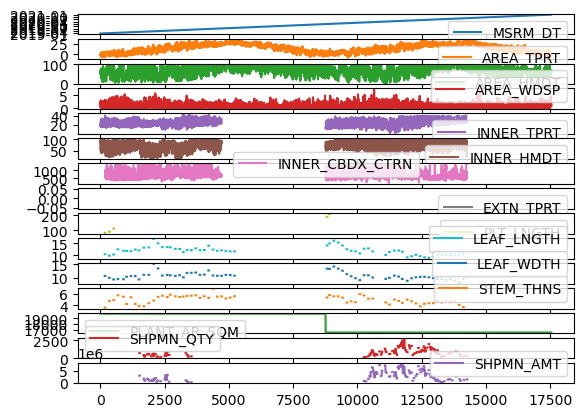

In [45]:
# 결측치 시각화
plt.figure(figsize=(40, 30))
df.plot(subplots=True)
plt.show()

## **환경변수 결측치 대체**

### **ARIMA**

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [47]:
#ARIMA

In [48]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# 결측치를 채우는 함수 (ARIMA 사용)
def fill_missing_with_arima(series, X, order=(5, 1, 0)):
    # X에서 결측값이 없는 행만 추출
    non_null_indices = X.dropna().index
    series_non_null = series.loc[non_null_indices]

    # 훈련 데이터와 테스트 데이터 분할
    train_size = int(len(series_non_null) * 0.8)
    train, test = series_non_null[:train_size], series_non_null[train_size:]

    # ARIMA 모델 적용
    model = ARIMA(train, order=order)
    fit_model = model.fit()

    # 모델을 이용해 테스트 데이터 예측
    predictions = fit_model.predict(start=train_size, end=len(series_non_null)-1, dynamic=False)

    # MSE 및 RMSE 평가
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)

    print(f'Performance for {series.name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}\n')

    # 예측된 값을 사용하여 결측값만 채우기
    filled_series = series.copy()
    filled_series.loc[series.isnull()] = fit_model.predict(start=0, end=len(series)-1, dynamic=False)[series.isnull()]

    return filled_series

# 환경 변수 리스트
env_vars = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']

# 각 변수의 결측치를 ARIMA 모델로 채움 및 성능 평가
for var in env_vars:
    df[var] = fill_missing_with_arima(df[var], df[['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']])

# 결과 확인
print(df[env_vars].head())


Performance for AREA_TPRT:
Mean Squared Error: 12.04533669599647
Root Mean Squared Error: 3.4706392344921806

Performance for AREA_HMDT:
Mean Squared Error: 261.3080969074286
Root Mean Squared Error: 16.16502696896694

Performance for INNER_TPRT:
Mean Squared Error: 35.012559620562676
Root Mean Squared Error: 5.917141169565137

Performance for INNER_HMDT:
Mean Squared Error: 522.783218291666
Root Mean Squared Error: 22.864453159690175

Performance for INNER_CBDX_CTRN:
Mean Squared Error: 60415.96049390276
Root Mean Squared Error: 245.79658356841082

   AREA_TPRT  AREA_HMDT  INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN
0       -1.9       50.0        19.1        87.0         0.000000
1       -3.2       54.0        18.8        87.0       767.366314
2       -2.5       62.0        18.5        87.0       577.774520
3       -2.5       62.0        18.1        87.0      1064.589829
4       -3.6       67.0        17.8        88.0       799.506240


### MICE

In [10]:
df2 = df.copy(deep=True)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FARM_ID          17544 non-null  object        
 1   MSRM_DT          17544 non-null  datetime64[ns]
 2   AREA_TPRT        17539 non-null  float64       
 3   AREA_HMDT        17517 non-null  float64       
 4   AREA_WDSP        17544 non-null  float64       
 5   INNER_TPRT       10100 non-null  float64       
 6   INNER_HMDT       9615 non-null   float64       
 7   INNER_CBDX_CTRN  7528 non-null   float64       
 8   EXTN_TPRT        0 non-null      float64       
 9   PLT_LNGTH        120 non-null    float64       
 10  LEAF_LNGTH       1488 non-null   float64       
 11  LEAF_WDTH        1488 non-null   float64       
 12  STEM_THNS        1488 non-null   float64       
 13  PLANT_AR_SQM     17544 non-null  int64         
 14  SHPMN_QTY        2640 non-null   float

In [91]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

# 결측값을 MICE 모델로 채우는 함수
def fill_missing_with_mice(df, max_iter=100, random_state=0):
    # IterativeImputer 초기화
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)

    # 전체 데이터프레임에서 결측값 대체
    imputed_data = imputer.fit_transform(df)

    # 원래의 데이터프레임과 동일한 구조로 데이터프레임 생성
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

    return imputed_df

# 임의로 결측값 추가하는 함수
def introduce_missing_values_randomly(df, missing_fraction=0.2, random_state=0):
    np.random.seed(random_state)
    df_with_missing = df.copy()

    # 총 셀 수에서 결측값을 추가할 개수 계산
    total_cells = df.size
    num_missing = int(total_cells * missing_fraction)

    # 랜덤하게 결측치를 추가할 위치 선택
    for _ in range(num_missing):
        row = random.randint(0, df.shape[0] - 1)
        col = random.randint(0, df.shape[1] - 1)
        df_with_missing.iat[row, col] = np.nan

    return df_with_missing

# 환경 변수 리스트 (사용자가 제공한 변수)
env_vars = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']

# 결측치가 없는 행만 필터링
df_no_missing = df2[env_vars].dropna()

# 결측치 없는 데이터에서 일부 값을 임의로 결측치로 변환
df_with_random_missing = introduce_missing_values_randomly(df_no_missing, missing_fraction=0.3)

# MICE로 결측치를 채움
df_imputed = fill_missing_with_mice(df_with_random_missing)
# 결측치 없는 데이터의 인덱스를 원본 데이터에서 추출
selected_indices = df_no_missing.index

# 원본 데이터 df2에서 필터링된 인덱스만 뽑아 새로운 df3 생성
df3 = df2.loc[selected_indices]

def evaluate_performance(original_series, imputed_series):

    original_values = original_series
    imputed_values = imputed_series

    mse = mean_squared_error(original_values, imputed_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_values, imputed_values)

    # 평가 결과 출력
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

# 각 변수에 대해 성능 평가
for var in env_vars:
    print(f"Evaluating performance for {var}...")

    # 성능 평가 (임의로 결측치로 만든 값들에 대해 원래 값과 대체된 값 비교)
    evaluate_performance(df3[var], df_imputed[var])


Evaluating performance for AREA_TPRT...
MSE: 10.321928414563706
RMSE: 3.2127758114384055
MAE: 1.258394405568147
Evaluating performance for AREA_HMDT...
MSE: 127.28276669369657
RMSE: 11.281966437359072
MAE: 4.649604290796064
Evaluating performance for INNER_TPRT...
MSE: 6.289509215599899
RMSE: 2.507889394610516
MAE: 1.001987542287631
Evaluating performance for INNER_HMDT...
MSE: 49.73492078214303
RMSE: 7.052298971409467
MAE: 2.779978575726105
Evaluating performance for INNER_CBDX_CTRN...
MSE: 12739.9068866994
RMSE: 112.87119600101435
MAE: 44.95552715108854


In [13]:
df_imputed

,AREA_TPRT,AREA_HMDT,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN
180,3.400000,54.297879,22.100000,72.0,758.237253
181,27.098216,33.000000,34.300000,87.0,601.000000
182,28.837160,28.000000,40.600000,61.0,985.000000
183,4.400000,24.000000,35.700000,54.0,868.000000
184,14.459302,29.000000,26.640059,58.0,637.933165
...,...,...,...,...,...
14241,28.100000,96.310336,24.800000,95.3,691.267893
14242,30.000000,78.000000,25.000000,96.7,626.992826
14243,30.700000,102.440996,26.100000,93.8,944.000000
14244,32.100000,64.000000,28.200000,89.5,541.026167


In [14]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7295 entries, 180 to 14255
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AREA_TPRT        7295 non-null   float64
 1   AREA_HMDT        7295 non-null   float64
 2   INNER_TPRT       7295 non-null   float64
 3   INNER_HMDT       7295 non-null   float64
 4   INNER_CBDX_CTRN  7295 non-null   float64
dtypes: float64(5)
memory usage: 342.0 KB


In [15]:
df4 = df.copy(deep=True)

In [16]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Required to enable the IterativeImputer
from sklearn.impute import IterativeImputer

# Defining the environmental variables
env_vars = ['AREA_TPRT', 'AREA_HMDT', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN']

# Applying MICE using IterativeImputer only to the selected columns
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on env_vars and transform the data
imputed_values = imputer.fit_transform(df2[env_vars])

# Update the original DataFrame with the imputed values for the specified columns
df4[env_vars] = imputed_values

# Results
print("Data After Imputing Missing Values for Selected Columns with MICE:")
print(df4.head())

Data After Imputing Missing Values for Selected Columns with MICE:
              FARM_ID             MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  \
0  GBE_KRMLN_002000at 2019-01-01 00:00:00       -1.9       50.0        1.6   
1  GBE_KRMLN_002000at 2019-01-01 01:00:00       -3.2       54.0        1.7   
2  GBE_KRMLN_002000at 2019-01-01 02:00:00       -2.5       62.0        2.1   
3  GBE_KRMLN_002000at 2019-01-01 03:00:00       -2.5       62.0        1.6   
4  GBE_KRMLN_002000at 2019-01-01 04:00:00       -3.6       67.0        0.8   

   INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  \
0        19.1        87.0       840.911874        NaN        NaN         NaN   
1        18.8        87.0       856.601990        NaN        NaN         NaN   
2        18.5        87.0       871.298626        NaN        NaN         NaN   
3        18.1        87.0       878.309889        NaN        NaN         NaN   
4        17.8        88.0       893.520363        NaN        NaN

In [17]:
# 각 컬럼의 결측치 비율 확인
missing_values = df4.isnull().sum() / len(df) * 100
print("결측치 비율:\n", missing_values)

결측치 비율:
 FARM_ID              0.000000
MSRM_DT              0.000000
AREA_TPRT            0.000000
AREA_HMDT            0.000000
AREA_WDSP            0.000000
INNER_TPRT           0.000000
INNER_HMDT           0.000000
INNER_CBDX_CTRN      0.000000
EXTN_TPRT          100.000000
PLT_LNGTH           99.316005
LEAF_LNGTH          91.518468
LEAF_WDTH           91.518468
STEM_THNS           91.518468
PLANT_AR_SQM         0.000000
SHPMN_QTY           84.952120
SHPMN_AMT           84.952120
dtype: float64


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FARM_ID          17544 non-null  object        
 1   MSRM_DT          17544 non-null  datetime64[ns]
 2   AREA_TPRT        17544 non-null  float64       
 3   AREA_HMDT        17544 non-null  float64       
 4   AREA_WDSP        17544 non-null  float64       
 5   INNER_TPRT       17544 non-null  float64       
 6   INNER_HMDT       17544 non-null  float64       
 7   INNER_CBDX_CTRN  17544 non-null  float64       
 8   EXTN_TPRT        0 non-null      float64       
 9   PLT_LNGTH        120 non-null    float64       
 10  LEAF_LNGTH       1488 non-null   float64       
 11  LEAF_WDTH        1488 non-null   float64       
 12  STEM_THNS        1488 non-null   float64       
 13  PLANT_AR_SQM     17544 non-null  int64         
 14  SHPMN_QTY        2640 non-null   float

## **외부온도 예측**

In [19]:
f2 = "C:\\Users\\kjhoe\\OneDrive\\바탕화~1-LAPTOP-VGOF9FJ7-25904429\\대외활동\\공모전\\2024 빅콘\\외부생산량.xlsx"
extp = pd.read_excel(f2)

In [20]:
extp.head()

,FARM_ID,MSRM_DT,AREA_NM,AREA_TPRT,AREA_HMDT,AREA_WDSP,EXTN_TPRT,EXTN_WDSP,EXTN_SRQT,SHPMN_QTY
0,GBE_KRMLN_002000aa,2019-01-01 00:00:00,성주,-1.9,50,1.6,NaN,NaN,NaN,NaN
1,GBE_KRMLN_002000aa,2019-01-01 01:00:00,성주,-3.2,54,1.7,NaN,NaN,NaN,NaN
2,GBE_KRMLN_002000aa,2019-01-01 02:00:00,성주,-2.5,62,2.1,NaN,NaN,NaN,NaN
3,GBE_KRMLN_002000aa,2019-01-01 03:00:00,성주,-2.5,62,1.6,NaN,NaN,NaN,NaN
4,GBE_KRMLN_002000aa,2019-01-01 04:00:00,성주,-3.6,67,0.8,NaN,NaN,NaN,NaN


In [21]:
extp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FARM_ID    8760 non-null   object        
 1   MSRM_DT    8760 non-null   datetime64[ns]
 2   AREA_NM    8760 non-null   object        
 3   AREA_TPRT  8760 non-null   float64       
 4   AREA_HMDT  8760 non-null   int64         
 5   AREA_WDSP  8760 non-null   float64       
 6   EXTN_TPRT  2316 non-null   float64       
 7   EXTN_WDSP  0 non-null      float64       
 8   EXTN_SRQT  0 non-null      float64       
 9   SHPMN_QTY  1392 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 684.5+ KB


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# 결측값 제거 (예를 들어, EXTN_TPRT가 결측값인 행 제거)
extp_clean = extp.dropna(subset=['EXTN_TPRT'])


In [23]:
extp_clean.head()

,FARM_ID,MSRM_DT,AREA_NM,AREA_TPRT,AREA_HMDT,AREA_WDSP,EXTN_TPRT,EXTN_WDSP,EXTN_SRQT,SHPMN_QTY
180,GBE_KRMLN_002000aa,2019-01-08 12:00:00,성주,3.4,36,2.4,11.9,NaN,NaN,NaN
181,GBE_KRMLN_002000aa,2019-01-08 13:00:00,성주,4.1,33,2.6,7.5,NaN,NaN,NaN
182,GBE_KRMLN_002000aa,2019-01-08 14:00:00,성주,4.2,28,2.5,7.6,NaN,NaN,NaN
183,GBE_KRMLN_002000aa,2019-01-08 15:00:00,성주,4.4,24,2.8,8.0,NaN,NaN,NaN
184,GBE_KRMLN_002000aa,2019-01-08 16:00:00,성주,3.5,29,2.6,6.2,NaN,NaN,NaN


In [24]:
# 특성 변수(X)와 목표 변수(y) 설정
X = extp_clean[['MSRM_DT','AREA_TPRT', 'AREA_HMDT','AREA_WDSP']]
y = extp_clean['EXTN_TPRT']

# 날짜 변수 처리 (datetime 형식으로 변환)
X['MSRM_DT'] = pd.to_datetime(X['MSRM_DT'])
X['MSRM_DT'] = X['MSRM_DT'].map(pd.Timestamp.timestamp)  # timestamp로 변환


In [25]:
# 훈련 및 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 선택 (랜덤 포레스트 회귀 사용)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 10.461266384892085


In [26]:
#하이퍼파라미터 튜닝 Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [28]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 모델 생성
rf = RandomForestRegressor(random_state=42)

# Grid Search 수행
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 확인
print("Best parameters found: ", grid_search.best_params_)

# 최적 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# MSE 평가
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Optimized Mean Squared Error: {mse_best}')

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Mean Squared Error: 12.186915908119584


In [29]:
#하이퍼파라미터 튜닝 bayesian optimization

In [30]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV



# Bayesian Optimization을 위한 하이퍼파라미터 그리드 설정
param_space = {
    'n_estimators': (100, 400),  # 최솟값과 최댓값 지정
    'max_depth': (None, 10, 20, 30),  # 선택 사항
    'min_samples_split': (2, 5, 10),
    'min_samples_leaf': (1, 2, 4),
    'max_features': ['sqrt', 'log2']
}

# Bayesian Optimization 수행
opt = BayesSearchCV(
    rf,
    param_space,
    n_iter=50,  # 반복 횟수
    cv=3,  # 교차 검증 횟수
    n_jobs=-1,  # 모든 코어 사용
    scoring='neg_mean_squared_error',
    random_state=42
)


In [32]:
# 모델 훈련
opt.fit(X_train, y_train)

# 최적 하이퍼파라미터 확인
print("Best parameters found: ", opt.best_params_)

# 최적 모델로 예측 수행
best_model_bayes = opt.best_estimator_
y_pred_bayes = best_model_bayes.predict(X_test)

# MSE 평가
mse_bayes = mean_squared_error(y_test, y_pred_bayes)
print(f'Bayesian Optimized Mean Squared Error: {mse_bayes}')


Best parameters found:  OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 377)])
Bayesian Optimized Mean Squared Error: 11.991405005210844


In [33]:
#그냥 제일 첫번째가 나음. 나머지 두개는 마크다운으로 바꿔놓음.

In [34]:
# df 데이터셋에서도 동일한 전처리 수행
df['MSRM_DT'] = pd.to_datetime(df['MSRM_DT'])
df['MSRM_DT'] = df['MSRM_DT'].map(pd.Timestamp.timestamp)  # timestamp로 변환

# 예측할 특성 변수 설정
X_df = df[['MSRM_DT','AREA_TPRT', 'AREA_HMDT','AREA_WDSP']]

# 모델을 사용하여 EXTN_TPRT 예측
df['EXTN_TPRT'] = model.predict(X_df)

df['MSRM_DT'] = df_1['MSRM_DT']
# 결과 확인
df.head()

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## **환경변수, 외부온도로 생육 결측값 대체**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FARM_ID          17544 non-null  object        
 1   MSRM_DT          17544 non-null  datetime64[ns]
 2   AREA_TPRT        17544 non-null  float64       
 3   AREA_HMDT        17544 non-null  float64       
 4   AREA_WDSP        17544 non-null  float64       
 5   INNER_TPRT       17544 non-null  float64       
 6   INNER_HMDT       17544 non-null  float64       
 7   INNER_CBDX_CTRN  17544 non-null  float64       
 8   EXTN_TPRT        0 non-null      float64       
 9   PLT_LNGTH        120 non-null    float64       
 10  LEAF_LNGTH       1488 non-null   float64       
 11  LEAF_WDTH        1488 non-null   float64       
 12  STEM_THNS        1488 non-null   float64       
 13  PLANT_AR_SQM     17544 non-null  int64         
 14  SHPMN_QTY        2640 non-null   float

In [33]:
#PLT_LNGTH 혼자서만 결측값 너무 많아서 따로함

In [34]:
# 예측할 변수와 특성 변수 설정
y = df['PLT_LNGTH']
X = df[['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT']]

# 결측값이 없는 데이터로만 필터링
X_non_null = X[y.notnull()]
y_non_null = y[y.notnull()]

In [35]:
# 훈련 및 테스트 데이터로 분할 (non-null 데이터에서 25%를 테스트로 사용)
X_train, X_test, y_train, y_test = train_test_split(X_non_null, y_non_null, test_size=0.30, random_state=42)


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# 다중 회귀 모델 생성 및 훈련
model1 = LinearRegression()
model1.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred1 = model1.predict(X_test)

# MSE 평가
mse = mean_squared_error(y_test, y_pred1)
print(f'Mean Squared Error on the test set: {mse}')

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred2 = rf_model.predict(X_test)

# MSE 평가
mse = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error on the test set (Random Forest): {mse}')


Mean Squared Error on the test set (Random Forest): 334.70746524956746


In [ ]:
#rf 이용

In [ ]:
# 결측값이 있는 행 추출
missing_mask = df['PLT_LNGTH'].isnull()
X_missing = df[missing_mask][['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT']]

# X_missing에서 결측값이 있는 행 제거 (결측값이 있는 X변수는 예측할 수 없으므로 제외)
X_missing_cleaned = X_missing.dropna()

# 결측값만 예측
predictions = rf_model.predict(X_missing_cleaned)

# 기존 값을 유지하고 결측값만 모델의 예측 값으로 채워넣음
df.loc[missing_mask, 'PLT_LNGTH'] = predictions

# 결과 확인
print(df.head())

              FARM_ID             MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  \
0  GBE_KRMLN_002000at 2019-01-01 00:00:00       -1.9       50.0        1.6   
1  GBE_KRMLN_002000at 2019-01-01 01:00:00       -3.2       54.0        1.7   
2  GBE_KRMLN_002000at 2019-01-01 02:00:00       -2.5       62.0        2.1   
3  GBE_KRMLN_002000at 2019-01-01 03:00:00       -2.5       62.0        1.6   
4  GBE_KRMLN_002000at 2019-01-01 04:00:00       -3.6       67.0        0.8   

   INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  \
0        19.1        87.0         0.000000    -0.9055    88.1450         NaN   
1        18.8        87.0       767.366314    -0.5880   105.4610         NaN   
2        18.5        87.0       577.774520    -2.2235    87.3695         NaN   
3        18.1        87.0      1064.589829    -1.8605   106.8105         NaN   
4        17.8        88.0       799.506240    -3.8485   100.2625         NaN   

   LEAF_WDTH  STEM_THNS  PLANT_AR_SQM  SHPMN_QTY  

In [ ]:
#이제 나머지 생육변수 예측

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# 예측할 y 변수와 X 변수 설정
y_variables = ['LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
X = df[['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'EXTN_TPRT']]

# y 변수로 설정
y = df[y_variables]

# 결측값이 없는 데이터로만 필터링
X_non_null = X[y.notnull().any(axis=1)]
y_non_null = y[y.notnull().any(axis=1)]


In [ ]:
# 훈련 및 테스트 데이터로 분할 (non-null 데이터에서 25%를 테스트로 사용)
X_train, X_test, y_train, y_test = train_test_split(X_non_null, y_non_null, test_size=0.25, random_state=42)

# MultiOutputRegressor를 사용하여 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
multi_output_model = MultiOutputRegressor(rf_model)
multi_output_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = multi_output_model.predict(X_test)


In [ ]:
# MSE 평가 및 출력
for i, var in enumerate(y_variables):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    print(f'Mean Squared Error on the test set ({var}): {mse}')


Mean Squared Error on the test set (LEAF_LNGTH): 1.331250634786627
Mean Squared Error on the test set (LEAF_WDTH): 0.9190904842583256
Mean Squared Error on the test set (STEM_THNS): 0.2460953534845431


In [ ]:
# 결측값이 있는 행 추출
missing_mask = y.isnull().any(axis=1)
X_missing = X[missing_mask]

# 결측값 예측
predictions = multi_output_model.predict(X_missing)
df.loc[missing_mask, y_variables] = predictions

# 결과 확인
print(df.head())

              FARM_ID             MSRM_DT  AREA_TPRT  AREA_HMDT  AREA_WDSP  \
0  GBE_KRMLN_002000at 2019-01-01 00:00:00       -1.9       50.0        1.6   
1  GBE_KRMLN_002000at 2019-01-01 01:00:00       -3.2       54.0        1.7   
2  GBE_KRMLN_002000at 2019-01-01 02:00:00       -2.5       62.0        2.1   
3  GBE_KRMLN_002000at 2019-01-01 03:00:00       -2.5       62.0        1.6   
4  GBE_KRMLN_002000at 2019-01-01 04:00:00       -3.6       67.0        0.8   

   INNER_TPRT  INNER_HMDT  INNER_CBDX_CTRN  EXTN_TPRT  PLT_LNGTH  LEAF_LNGTH  \
0        19.1        87.0         0.000000    -0.9055    88.1450   10.458500   
1        18.8        87.0       767.366314    -0.5880   105.4610   14.261500   
2        18.5        87.0       577.774520    -2.2235    87.3695   10.908875   
3        18.1        87.0      1064.589829    -1.8605   106.8105   12.784125   
4        17.8        88.0       799.506240    -3.8485   100.2625   13.091000   

   LEAF_WDTH  STEM_THNS  PLANT_AR_SQM  SHPMN_QTY  